<a href="https://colab.research.google.com/github/Loverzzz/E-commerceSales/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_ReynaldoABT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')  # Ganti dengan path file Anda
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Mengambil baris secara acak
data_sampled = data.sample(n=5000, random_state=42)

In [10]:
data_sampled = pd.read_csv('/content/data_sampled.csv', encoding='ISO-8859-1')
print(data_sampled.head())

  InvoiceNo StockCode                       Description  Quantity  \
0    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128                GOLD FISHING GNOME         4   
2    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4    546157     22180                    RETROSPOT LAMP         2   

        InvoiceDate  UnitPrice  CustomerID         Country  Cluster      PCA1  \
0    6/1/2011 12:05       0.85     17315.0  United Kingdom        0 -0.372383   
1   5/27/2011 17:14       6.95     14031.0  United Kingdom        0  0.551793   
2   4/21/2011 17:05       0.65     14031.0  United Kingdom        0 -0.192493   
3  11/16/2011 10:39       1.95     17198.0  United Kingdom        0 -0.028734   
4    3/10/2011 8:40       9.95     13502.0  United Kingdom        0  0.926567   

       PCA2  
0 -0.138304  
1  0.378835  
2 -0.365451  
3 -0.222044  
4  0.712905  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [11]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", data_sampled.shape)
print("Jenis data di setiap kolom:\n", data_sampled.dtypes)

Jumlah baris dan kolom: (3734, 11)
Jenis data di setiap kolom:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Cluster          int64
PCA1           float64
PCA2           float64
dtype: object


In [12]:
# Menangani Data yang Hilang
missing_values = data_sampled.isnull().sum()
print("Data yang hilang:\n", missing_values[missing_values > 0])

# Contoh penanganan missing values
# data.fillna(data.mean(), inplace=True)  # Mengisi dengan rata-rata untuk kolom numerikal
data_sampled.dropna(inplace=True) # Atau hapus baris dengan missing values

Data yang hilang:
 Series([], dtype: int64)


In [13]:
# Memeriksa kembali data yang hilang
missing_values = data_sampled.isnull().sum()
print("Data yang hilang setelah penanganan:\n", missing_values[missing_values > 0])

Data yang hilang setelah penanganan:
 Series([], dtype: int64)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [14]:
# Menghapus atau Menangani Data Kosong (Missing Values)
data_sampled.dropna(inplace=True)

# Menghapus Data Duplikat
data_sampled.drop_duplicates(inplace=True)

In [15]:
# Menghapus Outlier pada UnitPrice
Q1 = data_sampled['UnitPrice'].quantile(0.25)
Q3 = data_sampled['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_sampled = data_sampled[(data_sampled['UnitPrice'] >= lower_bound) & (data_sampled['UnitPrice'] <= upper_bound)]

# Menghapus Outlier pada Quantity
Q1 = data_sampled['Quantity'].quantile(0.25)
Q3 = data_sampled['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_sampled = data_sampled[(data_sampled['Quantity'] >= lower_bound) & (data_sampled['Quantity'] <= upper_bound)]

# Menghapus nilai negatif pada Quantity
data_sampled = data_sampled[data_sampled['Quantity'] >= 0]

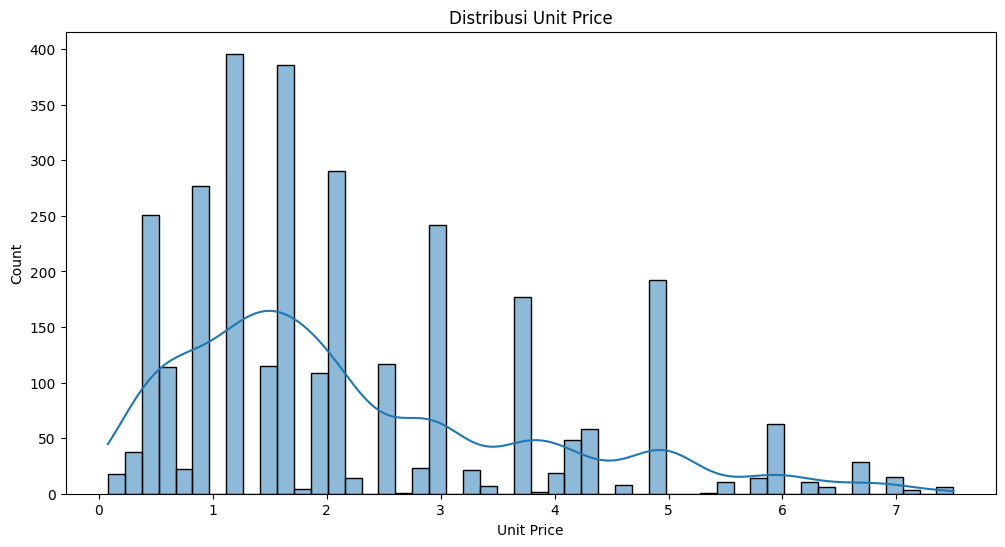

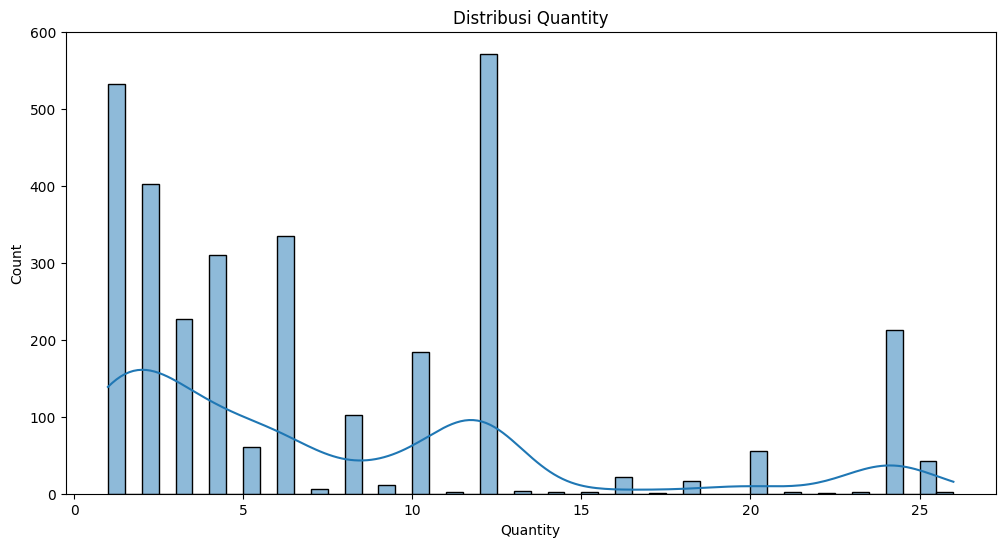

In [16]:
# Visualisasi Distribusi UnitPrice
plt.figure(figsize=(12, 6))
sns.histplot(data_sampled['UnitPrice'], bins=50, kde=True)
plt.title('Distribusi Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

# Visualisasi Distribusi Quantity
plt.figure(figsize=(12, 6))
sns.histplot(data_sampled['Quantity'], bins=50, kde=True)
plt.title('Distribusi Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()


In [17]:
# Normalisasi Data Numerikal
scaler = StandardScaler()
data_sampled[['Quantity', 'UnitPrice']] = scaler.fit_transform(data_sampled[['Quantity', 'UnitPrice']])

# Encoding Data Kategorikal (Country)
data_encoded = pd.get_dummies(data_sampled, columns=['Country'], drop_first=True)

# Menentukan Fitur Clustering
features = ['UnitPrice'] + [col for col in data_encoded.columns if 'Country_' in col]
print("Fitur yang digunakan untuk clustering:", features)


Fitur yang digunakan untuk clustering: ['UnitPrice', 'Country_Austria', 'Country_Belgium', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Iceland', 'Country_Italy', 'Country_Japan', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified']


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Model GMM
silhouette_scores_gmm = []
k_range = range(2, 11)  # Range jumlah cluster
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(data_encoded[features])
    score = silhouette_score(data_encoded[features], labels)
    silhouette_scores_gmm.append(score)

# Pilih jumlah cluster optimal berdasarkan Silhouette Score
optimal_k_gmm = k_range[silhouette_scores_gmm.index(max(silhouette_scores_gmm))]
print(f"Jumlah cluster optimal dengan GMM: {optimal_k_gmm}")
print(f"Silhouette Score tertinggi dengan GMM: {max(silhouette_scores_gmm):.3f}")


Jumlah cluster optimal dengan GMM: 5
Silhouette Score tertinggi dengan GMM: 0.565


In [37]:
# Melatih model dengan jumlah cluster optimal
gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
data_encoded['Cluster'] = gmm.fit_predict(data_encoded[features])

# Menampilkan jumlah data di setiap cluster
print("Jumlah data di setiap cluster:")
print(data_encoded['Cluster'].value_counts())


Jumlah data di setiap cluster:
Cluster
1    1818
2     938
0     141
4     131
3      80
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [38]:
from sklearn.metrics import silhouette_score

# Evaluasi model dengan Silhouette Score
silhouette_avg = silhouette_score(data_encoded[features], data_encoded['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

if silhouette_avg >= 0.55:
    print("Model memenuhi kriteria dengan Silhouette Score >= 0.55")
else:
    print("Model belum memenuhi kriteria. Silhouette Score terlalu rendah.")



Silhouette Score: 0.565
Model memenuhi kriteria dengan Silhouette Score >= 0.55


## **c. Feature Selection (Opsional)** tidak menggunakan ini

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

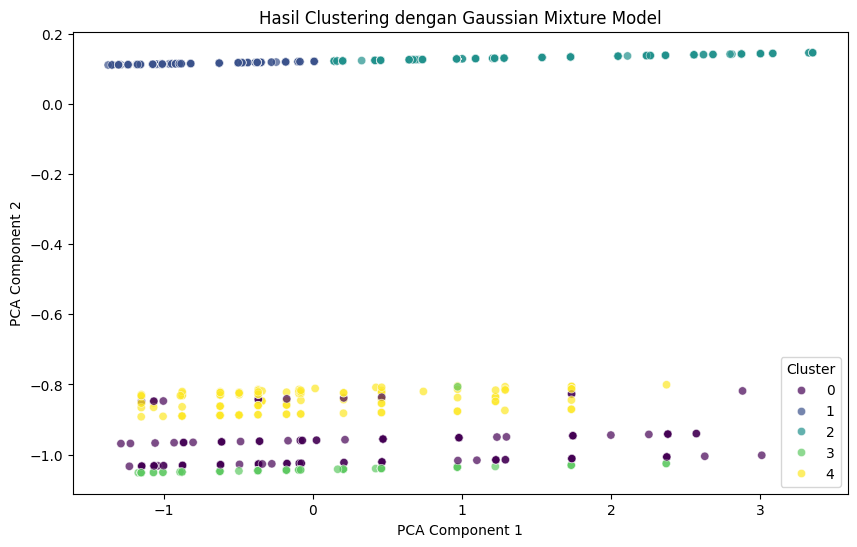

In [39]:
gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
data_encoded['Cluster_GMM'] = gmm.fit_predict(data_encoded[features])

#Visualisasi Hasil Clustering dengan PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded[features])
data_encoded['PCA1'] = pca_result[:, 0]
data_encoded['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='PCA1', y='PCA2', hue='Cluster_GMM', palette='viridis', alpha=0.7)
plt.title('Hasil Clustering dengan Gaussian Mixture Model')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [51]:
# Analisis karakteristik tiap cluster
for cluster in sorted(data_encoded['Cluster'].unique()):
    print(f"\n{'='*50}")
    print(f"Cluster {cluster}")
    print(f"{'='*50}")

    cluster_data = data_encoded[data_encoded['Cluster'] == cluster]

    # Ukuran cluster
    print(f"Jumlah Data: {len(cluster_data)} ({(len(cluster_data)/len(data_encoded)*100):.1f}% dari total)")

    # Statistik UnitPrice dan Quantity
    print("\nStatistik Deskriptif:")
    print(f"UnitPrice (standardized):")
    print(f"- Mean: {cluster_data['UnitPrice'].mean():.2f}")
    print(f"- Std: {cluster_data['UnitPrice'].std():.2f}")

    print(f"\nQuantity (standardized):")
    print(f"- Mean: {cluster_data['Quantity'].mean():.2f}")
    print(f"- Std: {cluster_data['Quantity'].std():.2f}")

    # Distribusi negara
    country_columns = [col for col in data_encoded.columns if 'Country_' in col]
    country_dist = cluster_data[country_columns].sum().sort_values(ascending=False)

    print("\nTop 5 Negara:")
    for country, count in country_dist.head().items():
        country_name = country.replace('Country_', '')
        percentage = (count/len(cluster_data)*100)
        print(f"- {country_name}: {percentage:.1f}%")

    # Interpretasi cluster
    print("\nInterpretasi:")
    if cluster_data['UnitPrice'].mean() > 0.5:
        price_segment = "premium (high-value)"
    elif cluster_data['UnitPrice'].mean() < -0.5:
        price_segment = "budget (low-value)"
    else:
        price_segment = "mid-range"

    print(f"Cluster ini merepresentasikan segmen {price_segment}")
    print(f"dengan konsentrasi tinggi di {country_dist.index[0].replace('Country_', '')}")

    if cluster_data['Quantity'].mean() > 0.5:
        print("Pelanggan cenderung membeli dalam jumlah besar")
    elif cluster_data['Quantity'].mean() < -0.5:
        print("Pelanggan cenderung membeli dalam jumlah kecil")
    else:
        print("Pelanggan membeli dalam jumlah sedang")


Cluster 0
Jumlah Data: 141 (4.5% dari total)

Statistik Deskriptif:
UnitPrice (standardized):
- Mean: 0.25
- Std: 1.16

Quantity (standardized):
- Mean: 0.54
- Std: 1.06

Top 5 Negara:
- Germany: 52.5%
- EIRE: 39.0%
- Portugal: 8.5%
- Austria: 0.0%
- Channel Islands: 0.0%

Interpretasi:
Cluster ini merepresentasikan segmen mid-range
dengan konsentrasi tinggi di Germany
Pelanggan cenderung membeli dalam jumlah besar

Cluster 1
Jumlah Data: 1818 (58.5% dari total)

Statistik Deskriptif:
UnitPrice (standardized):
- Mean: -0.61
- Std: 0.37

Quantity (standardized):
- Mean: 0.14
- Std: 1.07

Top 5 Negara:
- United Kingdom: 100.0%
- Austria: 0.0%
- Canada: 0.0%
- Belgium: 0.0%
- Cyprus: 0.0%

Interpretasi:
Cluster ini merepresentasikan segmen budget (low-value)
dengan konsentrasi tinggi di United Kingdom
Pelanggan membeli dalam jumlah sedang

Cluster 2
Jumlah Data: 938 (30.2% dari total)

Statistik Deskriptif:
UnitPrice (standardized):
- Mean: 1.16
- Std: 0.78

Quantity (standardized):
- Me

Tulis hasil interpretasinya di sini.

1. Cluster 0: Segmen Mid-Range German Buyers

    Merupakan 4.5% dari total pelanggan (141 pelanggan)
    Karakteristik:

    UnitPrice menengah (mean: 0.25)
    Volume pembelian tinggi (mean Quantity: 0.54)
    Didominasi oleh pelanggan dari Jerman (52.5%) dan Irlandia (39%)

  Interpretasi: Cluster ini merepresentasikan pelanggan yang membeli dalam jumlah besar dengan harga menengah, terutama dari pasar Jerman dan Irlandia. Pola ini menunjukkan kemungkinan segmen wholesaler atau distributor menengah di kawasan tersebut.

2. Cluster 1: Segmen Value UK Shoppers

    Merupakan cluster terbesar dengan 58.5% dari total pelanggan (1,818 pelanggan)
    Karakteristik:

    UnitPrice rendah (mean: -0.61)
    Volume pembelian menengah (mean Quantity: 0.14)
    Eksklusif pelanggan UK (100%)


  Interpretasi: Ini adalah segmen mass market di UK yang fokus pada produk-produk dengan harga lebih terjangkau. Besarnya ukuran cluster ini menunjukkan bahwa ini adalah basis pelanggan utama perusahaan.

3. Cluster 2: Segmen Premium UK Market

    Merupakan 30.2% dari total pelanggan (938 pelanggan)
    Karakteristik:

    UnitPrice sangat tinggi (mean: 1.16)
    Volume pembelian cenderung rendah (mean Quantity: -0.45)
    Eksklusif pelanggan UK (100%)

  Interpretasi: Cluster ini merepresentasikan segmen premium di pasar UK, dengan fokus pada produk-produk bernilai tinggi namun dalam kuantitas yang lebih kecil. Kemungkinan merupakan pelanggan ritel high-end atau specialty stores.

4. Cluster 3: Segmen French Volume Buyers

Merupakan 2.6% dari total pelanggan (80 pelanggan)
Karakteristik:

UnitPrice menengah (mean: -0.06)
Volume pembelian tinggi (mean Quantity: 0.53)
Hampir eksklusif pelanggan Prancis (98.8%)


Interpretasi: Cluster ini merepresentasikan pelanggan Prancis yang membeli dalam volume besar dengan harga menengah, menunjukkan kemungkinan segmen distributor atau retail chain di pasar Prancis.

5. Cluster 4: Segmen European Mixed Market

    Merupakan 4.2% dari total pelanggan (131 pelanggan)
    Karakteristik:

    UnitPrice menengah (mean: -0.09)
    Volume pembelian menengah ke tinggi (mean Quantity: 0.45)
    Tersebar di berbagai negara Eropa (Spanyol 22.1%, Belgia 14.5%, Swiss 10.7%)


  Interpretasi: Cluster ini merepresentasikan segmen pasar yang lebih terdiversifikasi di Eropa, dengan pola pembelian menengah baik dari segi harga maupun volume.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengeksport Data
data_sampled.to_csv('/content/drive/MyDrive/E-CommerceSales/clustered_data.csv', index=False)